In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import NuSVC

# Step1:
1. randomly create the dataset with two features as X_two, and using xor function to get the y_two, the size of dataset is 100

In [2]:
# X = np.array([[0,0],[0,1],[1,0],[1,1]])
# y = np.array([0,1,1,0])

#create 100 data points between [0,1], and use xor function for X to get the y
rng = np.random.RandomState(42)
X_two = rng.randn(100, 2)
y_two = np.logical_xor(X_two[:, 0] > 0, X_two[:, 1] > 0)

# Step 2:
1. I use the svm classifier called SVC from sklearn
2. And using fit method to train the model

In [4]:
clf = SVC(kernel='rbf')
clf.fit(X_two,y_two)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Step 3:
1. using the plot to show the classify result 

In [5]:
# create the grid for model
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),np.linspace(-3, 3, 500))

D:\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linetypes'
  s)


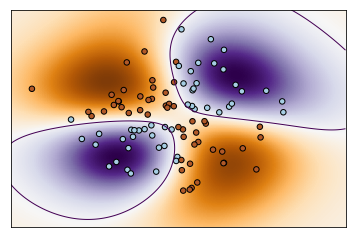

In [6]:
#create the plot for the decision boundary and data
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=1,linetypes='--')
plt.scatter(X_two[:, 0], X_two[:, 1], s=30, c=y_two, cmap=plt.cm.Paired,edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

# Step 4:
1. Because this is non-linear kernel, so i can't calculate the margin, but in sklearn i find a method called "decision_function" which can calculate the distance between point X to the hyperplane
2. So i try to use the support_vectors_ method to get all support vectors and use decision_function to calculate the distance and i call it margin
3. Then i remove all the non-support vectors and using "X_two_remove" and "y_two_remove" to represent the remain X and y dataset
4. Then i relearn the model and fit 

In [8]:
margin_two = clf.decision_function(clf.support_vectors_ )

In [9]:
#delete the non-support vectors
X_two_remove = clf.support_vectors_
y_two_remove = np.logical_xor(X_two_remove[:, 0] > 0, X_two_remove[:, 1] > 0)

In [10]:
#relearn the model
clf.fit(X_two_remove,y_two_remove)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Step 5:
1. As you can see this plot is the model which remove non-support vectors

D:\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linetypes'
  s)


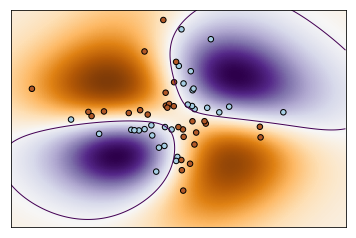

In [11]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=1,linetypes='--')
plt.scatter(X_two_remove[:, 0], X_two_remove[:, 1], s=30, c=y_two_remove, cmap=plt.cm.Paired,edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

# Step 6:
1. i wil calculate the so called "margin" with two feature dataset without non-support vectors
2. the way to calculate just following the same way of step 2 and 3 and 4

In [12]:
#margin of removed vectors
margin_two_remove=clf.decision_function(clf.support_vectors_ )

In [30]:
#we can see that remove the non_support vectors will not influence the margin of SVM
# print(margin_two == margin_two_remove)
print((margin_two-margin_two_remove).mean())

0.0


# Conclusion:
1. we can see that the the hyperplane is the same whether you remove the non-support vectors or not, so the margin do not increase or decrease and this is because only the support vectors influence the margin and hyperplane

# Step 7:
1. I will remove the support vectors from the original dataset of two features

In [21]:
#Remove the support vectors
X_two_remove_support = []
for i in range(len(X_two)):
    if(X_two[i] in X_two_remove):
        continue
    else:
        X_two_remove_support.append(X_two[i])
#change [] into np.array type
X_two_remove_support = np.asarray(X_two_remove_support)
y_two_remove_support = np.logical_xor(X_two_remove_support[:, 0] > 0, X_two_remove_support[:, 1] > 0)

# Step 8:
1. Just the same way like before to fit and plot the result 

In [23]:
clf.fit(X_two_remove_support,y_two_remove_support)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

D:\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linetypes'
  s)


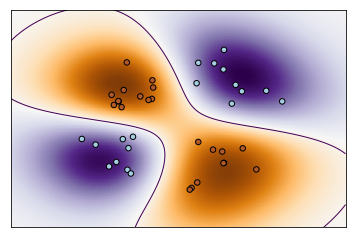

In [24]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=1,linetypes='--')
plt.scatter(X_two_remove_support[:, 0], X_two_remove_support[:, 1], s=30, c=y_two_remove_support, cmap=plt.cm.Paired,edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

# Step 9:
1. And then i will calculate the "margin" of model which remove the support vectors


In [25]:
margin_two_remove_support = clf.decision_function(X_two_remove_support)

In [27]:
print(margin_two_remove_support.mean())

0.07436259314241613


In [28]:
print(margin_two.mean())

0.07433865940233048


In [29]:
print(margin_two_remove.mean())

0.07433865940233048


# Conclusion:
1. We can see that the margin of original dataset and dataset remove non-support vectors is the same
2. But for dataset which remove the support vectors, we can see that the margin is larger than original and remove non-support vectors dataset, so the margin increase

# This is for 3-features XOR dataset
For 3 features dataset, all the way and methods is the same of 2 features

# Step 1:
1.randomly create the 3 feature dataset and using xor function to get the y of dataset

In [53]:
# XX = np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
# yy = np.array([0,1,1,0,1,0,0,1])

rng = np.random.RandomState(42)
X_three = rng.randn(100, 3)
y_three = np.logical_xor(X_three[:, 0] > 0, X_three[:, 1] > 0,X_three[:,2] >0)

In [54]:
# ax = plt.subplot(111,projection='3d')
# ax.scatter([0,0,1,1],[0,1,0,1],[0,1,1,0],c ='b')
# ax.scatter([0,0,1,1],[0,1,0,1],[1,0,0,1],c='g')

# Step 2:
1. Using gaussian kernel in SVC classifier and fit the dataset of three features 

In [55]:
clf1 = SVC(kernel = 'rbf')
clf1.fit(X_three,y_three)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Step 3:
1. Usig "support_vectors" and "decision_function" method to calculate the so called "margin"

In [56]:
margin_three = clf1.decision_function(clf1.support_vectors_)

# Step 4:
1. Because the 3-D plot is difficult to plot, so for 3 features i just calculate
2. delete the non_support vectors
3. relearn the model and fit the new dataset
4. calculate the margin with non-support vectors

In [57]:
#delete the non_support vectors
X_three_remove = clf1.support_vectors_
y_three_remove =  np.logical_xor(X_three_remove[:, 0] > 0, X_three_remove[:, 1] > 0,X_three_remove[:,2] >0)

In [58]:
clf1.fit(X_three_remove,y_three_remove)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [59]:
margin_three_remove = clf1.decision_function(clf1.support_vectors_)

In [60]:
# let us see the original data and remove non-support vector data
print(margin_three.mean()-margin_three_remove.mean())

0.0


# Conclusion
As we can see the margin is the same

# Step 4:
1. remove the support vectors
2. relearn the model and fit
3. calculate the "margin"

In [61]:
#Remove the support vectors
X_three_remove_support = []
for i in range(len(X_three)):
    if(X_three[i] in X_three_remove):
        continue
    else:
        X_three_remove_support.append(X_three[i])
#change [] into np.array type
X_three_remove_support = np.asarray(X_three_remove_support)
between = np.logical_xor(X_three_remove_support[:, 0] > 0, X_three_remove_support[:, 1] > 0)
y_three_remove_support = np.logical_xor(between,X_three_remove_support[:,2]>0)

In [62]:
clf1.fit(X_three_remove_support,y_three_remove_support)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [63]:
margin_three_remove_support = clf1.decision_function(clf1.support_vectors_)

In [64]:
print(margin_three_remove_support.mean())

-0.3875874219529273


In [65]:
print(margin_three_remove.mean())

-0.09806559443962672


In [66]:
print(margin_three.mean())

-0.09806559443962672


# Conclusion
As we can see, the margin of oringial and remove non-support vectors dataset is the same, but for the dataset which remove the support vectors,the margi is larger than the original and remove on-support vectors dataset,so the margin increase